In [46]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [47]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

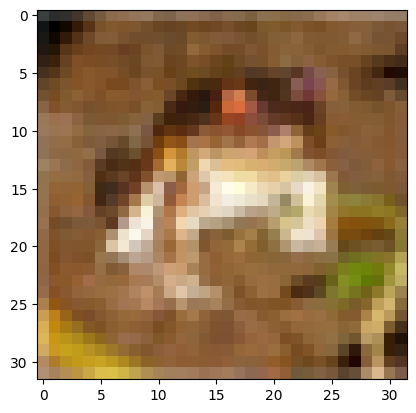

In [48]:
plt.imshow(x_train[0])

In [49]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [50]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [51]:
y_test=y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [52]:
x_train=x_train/255.0
x_test=x_test/255.0

In [53]:
custom= models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(2000, activation='relu'),
    layers.Dense(10, activation='softmax')
])
custom.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
custom.fit(x_train, y_train, epochs=5)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 153s 97ms/step - accuracy: 0.2910 - loss: 2.2224
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 152s 97ms/step - accuracy: 0.3887 - loss: 1.7081
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 156s 100ms/step - accuracy: 0.4232 - loss: 1.6202
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 177s 84ms/step - accuracy: 0.4423 - loss: 1.5673
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 155s 99ms/step - accuracy: 0.4555 - loss: 1.5387


In [54]:
ans= ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [55]:
from sklearn.metrics import classification_report
y_pred=custom.predict(x_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


array([[5.8799364e-02, 5.9085641e-02, 2.4915673e-01, ..., 7.4256519e-03,
        7.0950635e-02, 2.6662979e-02],
       [3.1058017e-02, 2.0927668e-01, 4.3084900e-04, ..., 4.1249172e-05,
        1.9480714e-01, 5.6404066e-01],
       [1.9029017e-01, 1.8326107e-01, 3.0568687e-03, ..., 4.5268159e-04,
        4.3676707e-01, 1.8419765e-01],
       ...,
       [7.5045996e-04, 7.2276613e-05, 2.5625044e-01, ..., 1.0208085e-02,
        1.5797583e-02, 2.3400746e-04],
       [5.5731222e-02, 1.7509159e-02, 4.7982153e-01, ..., 5.6096627e-03,
        2.1621229e-02, 4.8079095e-03],
       [6.7961343e-02, 3.3979316e-03, 2.0769435e-01, ..., 1.9558294e-01,
        9.8059773e-03, 1.7612949e-02]], dtype=float32)

In [56]:
y_pred_ans= [np.argmax(i) for i in y_pred]
y_pred_ans[:5]

[np.int64(2), np.int64(9), np.int64(8), np.int64(8), np.int64(4)]

In [57]:
print(classification_report(y_test, y_pred_ans))

              precision    recall  f1-score   support

           0       0.55      0.47      0.51      1000
           1       0.57      0.55      0.56      1000
           2       0.31      0.44      0.36      1000
           3       0.37      0.18      0.24      1000
           4       0.37      0.43      0.40      1000
           5       0.41      0.30      0.34      1000
           6       0.46      0.52      0.49      1000
           7       0.72      0.27      0.40      1000
           8       0.51      0.67      0.58      1000
           9       0.42      0.65      0.51      1000

    accuracy                           0.45     10000
   macro avg       0.47      0.45      0.44     10000
weighted avg       0.47      0.45      0.44     10000



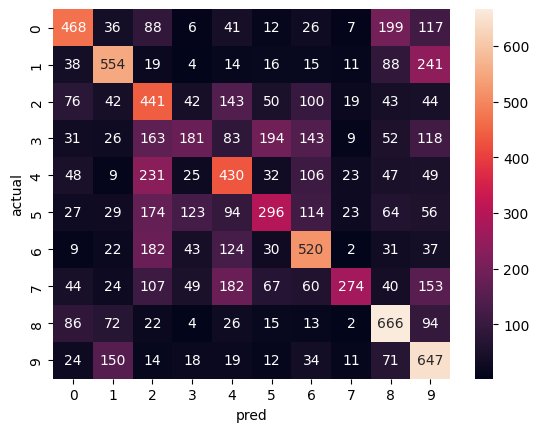

In [58]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred_ans)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("pred")
plt.ylabel("actual")
plt.show()

In [59]:
y_pred_ans[:5]

[np.int64(2), np.int64(9), np.int64(8), np.int64(8), np.int64(4)]

In [60]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [61]:
cnn= models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 42ms/step - accuracy: 0.3839 - loss: 1.6935
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.6011 - loss: 1.1349
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 43ms/step - accuracy: 0.6605 - loss: 0.9697
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.6934 - loss: 0.8786
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7211 - loss: 0.8037


In [63]:
x_train[0].shape

(32, 32, 3)

In [64]:
y_pred_cnn= cnn.predict(x_test)
y_pred_cnn

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


array([[3.85789596e-03, 2.96770275e-04, 2.15215720e-02, ...,
        2.35172309e-04, 7.43296742e-02, 1.08577765e-03],
       [1.38347782e-02, 2.90567074e-02, 2.07280362e-04, ...,
        8.60644377e-07, 9.49423313e-01, 7.45081529e-03],
       [1.26715496e-01, 7.62947276e-02, 1.97106078e-02, ...,
        1.69962775e-02, 5.35582721e-01, 2.03985855e-01],
       ...,
       [3.94736137e-03, 8.91605305e-05, 1.11615248e-01, ...,
        7.75457844e-02, 1.08221790e-03, 3.57501442e-04],
       [1.01934016e-01, 8.14093053e-02, 6.71890453e-02, ...,
        1.30818039e-02, 2.82727880e-04, 2.06358917e-03],
       [2.79013457e-05, 9.31504183e-05, 6.91527827e-03, ...,
        9.40365732e-01, 2.61356090e-05, 2.08783586e-05]], dtype=float32)

In [65]:
y_pred_cnn_ans= [np.argmax(i) for i in y_pred_cnn]
y_pred_cnn_ans[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [66]:
print(classification_report(y_test, y_pred_cnn_ans))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      1000
           1       0.88      0.72      0.79      1000
           2       0.55      0.62      0.58      1000
           3       0.53      0.51      0.52      1000
           4       0.64      0.61      0.62      1000
           5       0.60      0.58      0.59      1000
           6       0.70      0.82      0.75      1000
           7       0.79      0.68      0.73      1000
           8       0.79      0.79      0.79      1000
           9       0.77      0.78      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



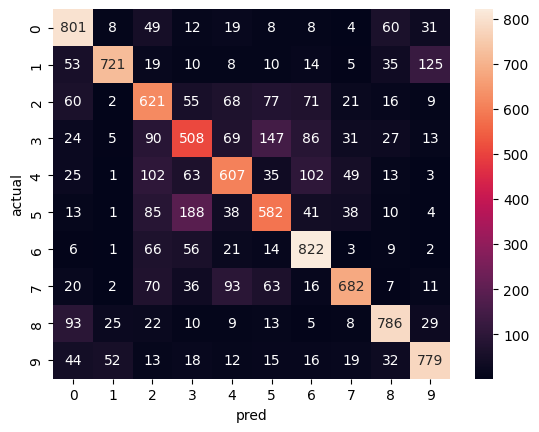

In [67]:
cm_cnn=confusion_matrix(y_test, y_pred_cnn_ans)
sns.heatmap(cm_cnn, annot=True, fmt='d')
plt.xlabel("pred")
plt.ylabel("actual")
plt.show()